# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
data=pd.read_csv("housing.csv")
data=data.drop('CHAS',axis=1)

#  Converting categorical variables with numerically coded values

In [3]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


# There is no categorial data in my dataset

# Identify and treat missing values and remove dataset outliers

In [5]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Performing univariate analysis

Here we will analyse the data one by one (taking one data varible at a time)

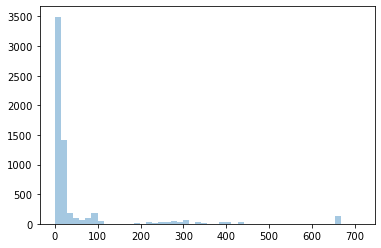

In [6]:
sb.distplot(data,kde=False)

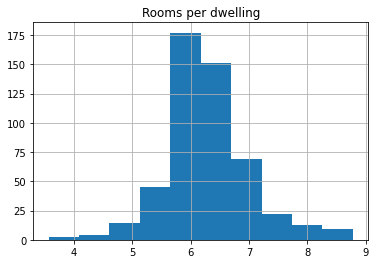

In [7]:
data.RM.hist()
plt.title("Rooms per dwelling")
plt.show()

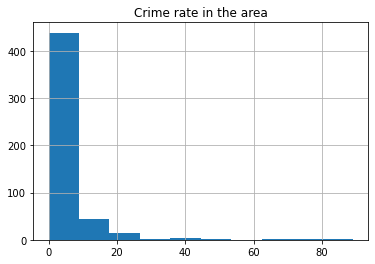

In [8]:
data.CRIM.hist()
plt.title("Crime rate in the area")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B29235130>,
      dtype=object)

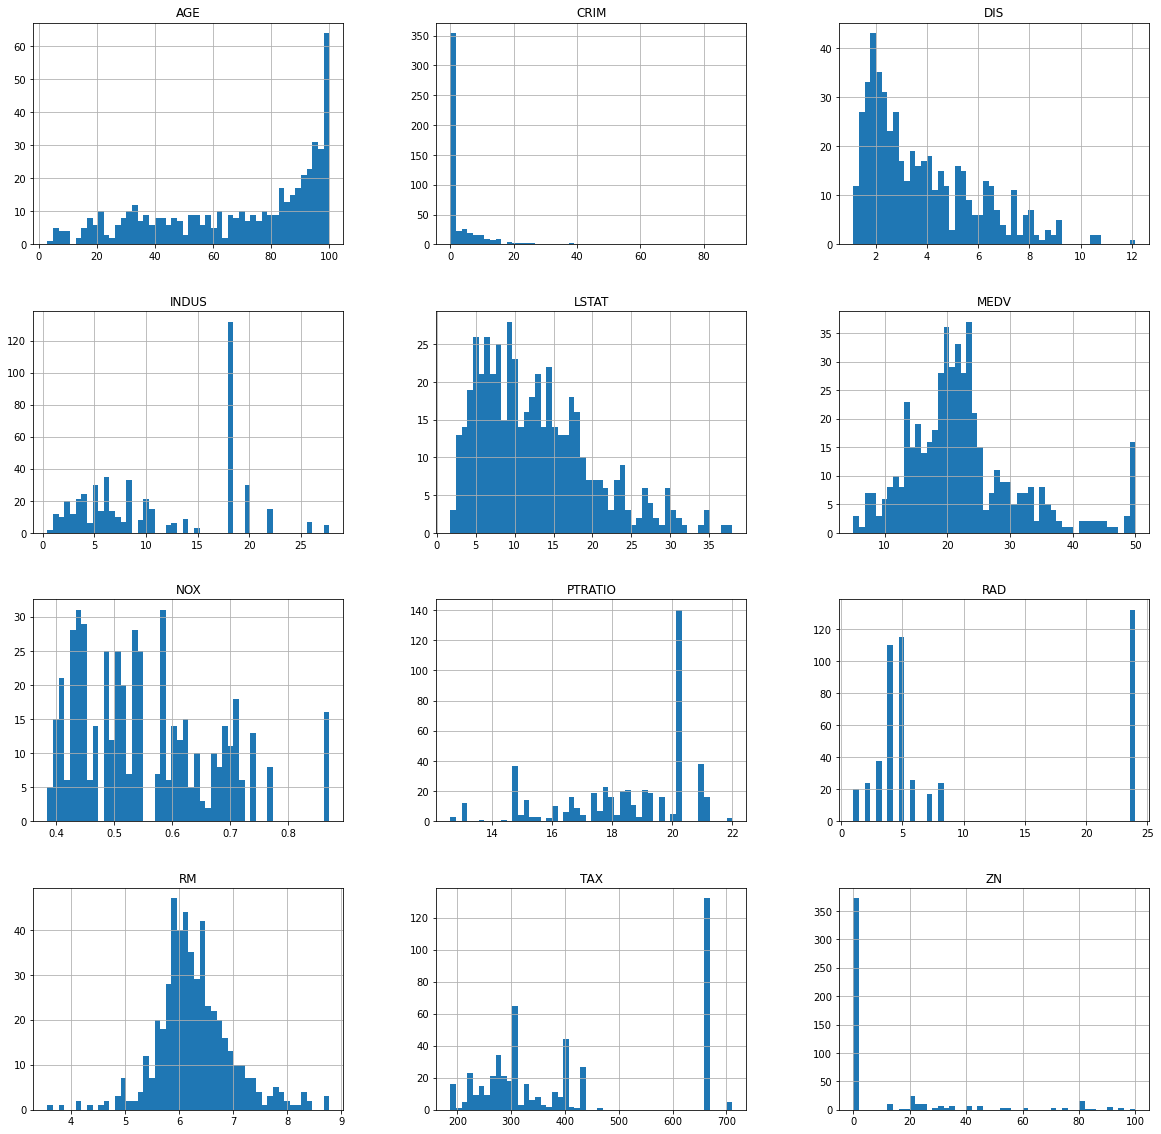

In [9]:
data.hist(bins=50,figsize=(20,20))

Here i have have made histogram plot of all the label to see the data distribution

# Performing bivariate analysis

It will help us to understand how to attributes are related to each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B2A30F5E0>,
      dtype=object)

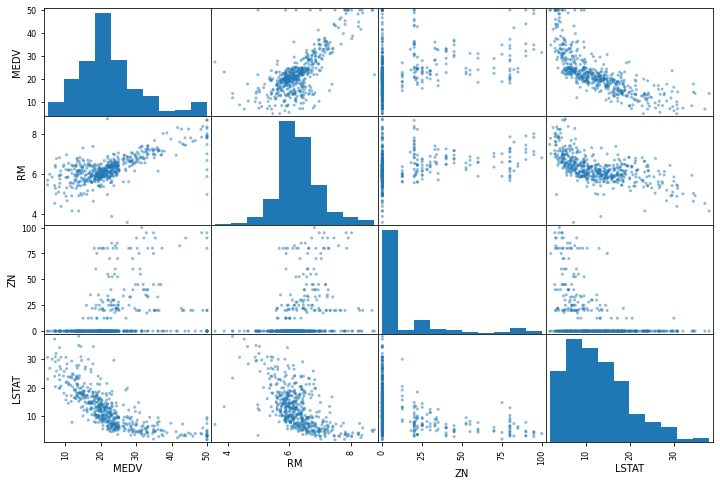

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(data[attributes],figsize =(12,8))

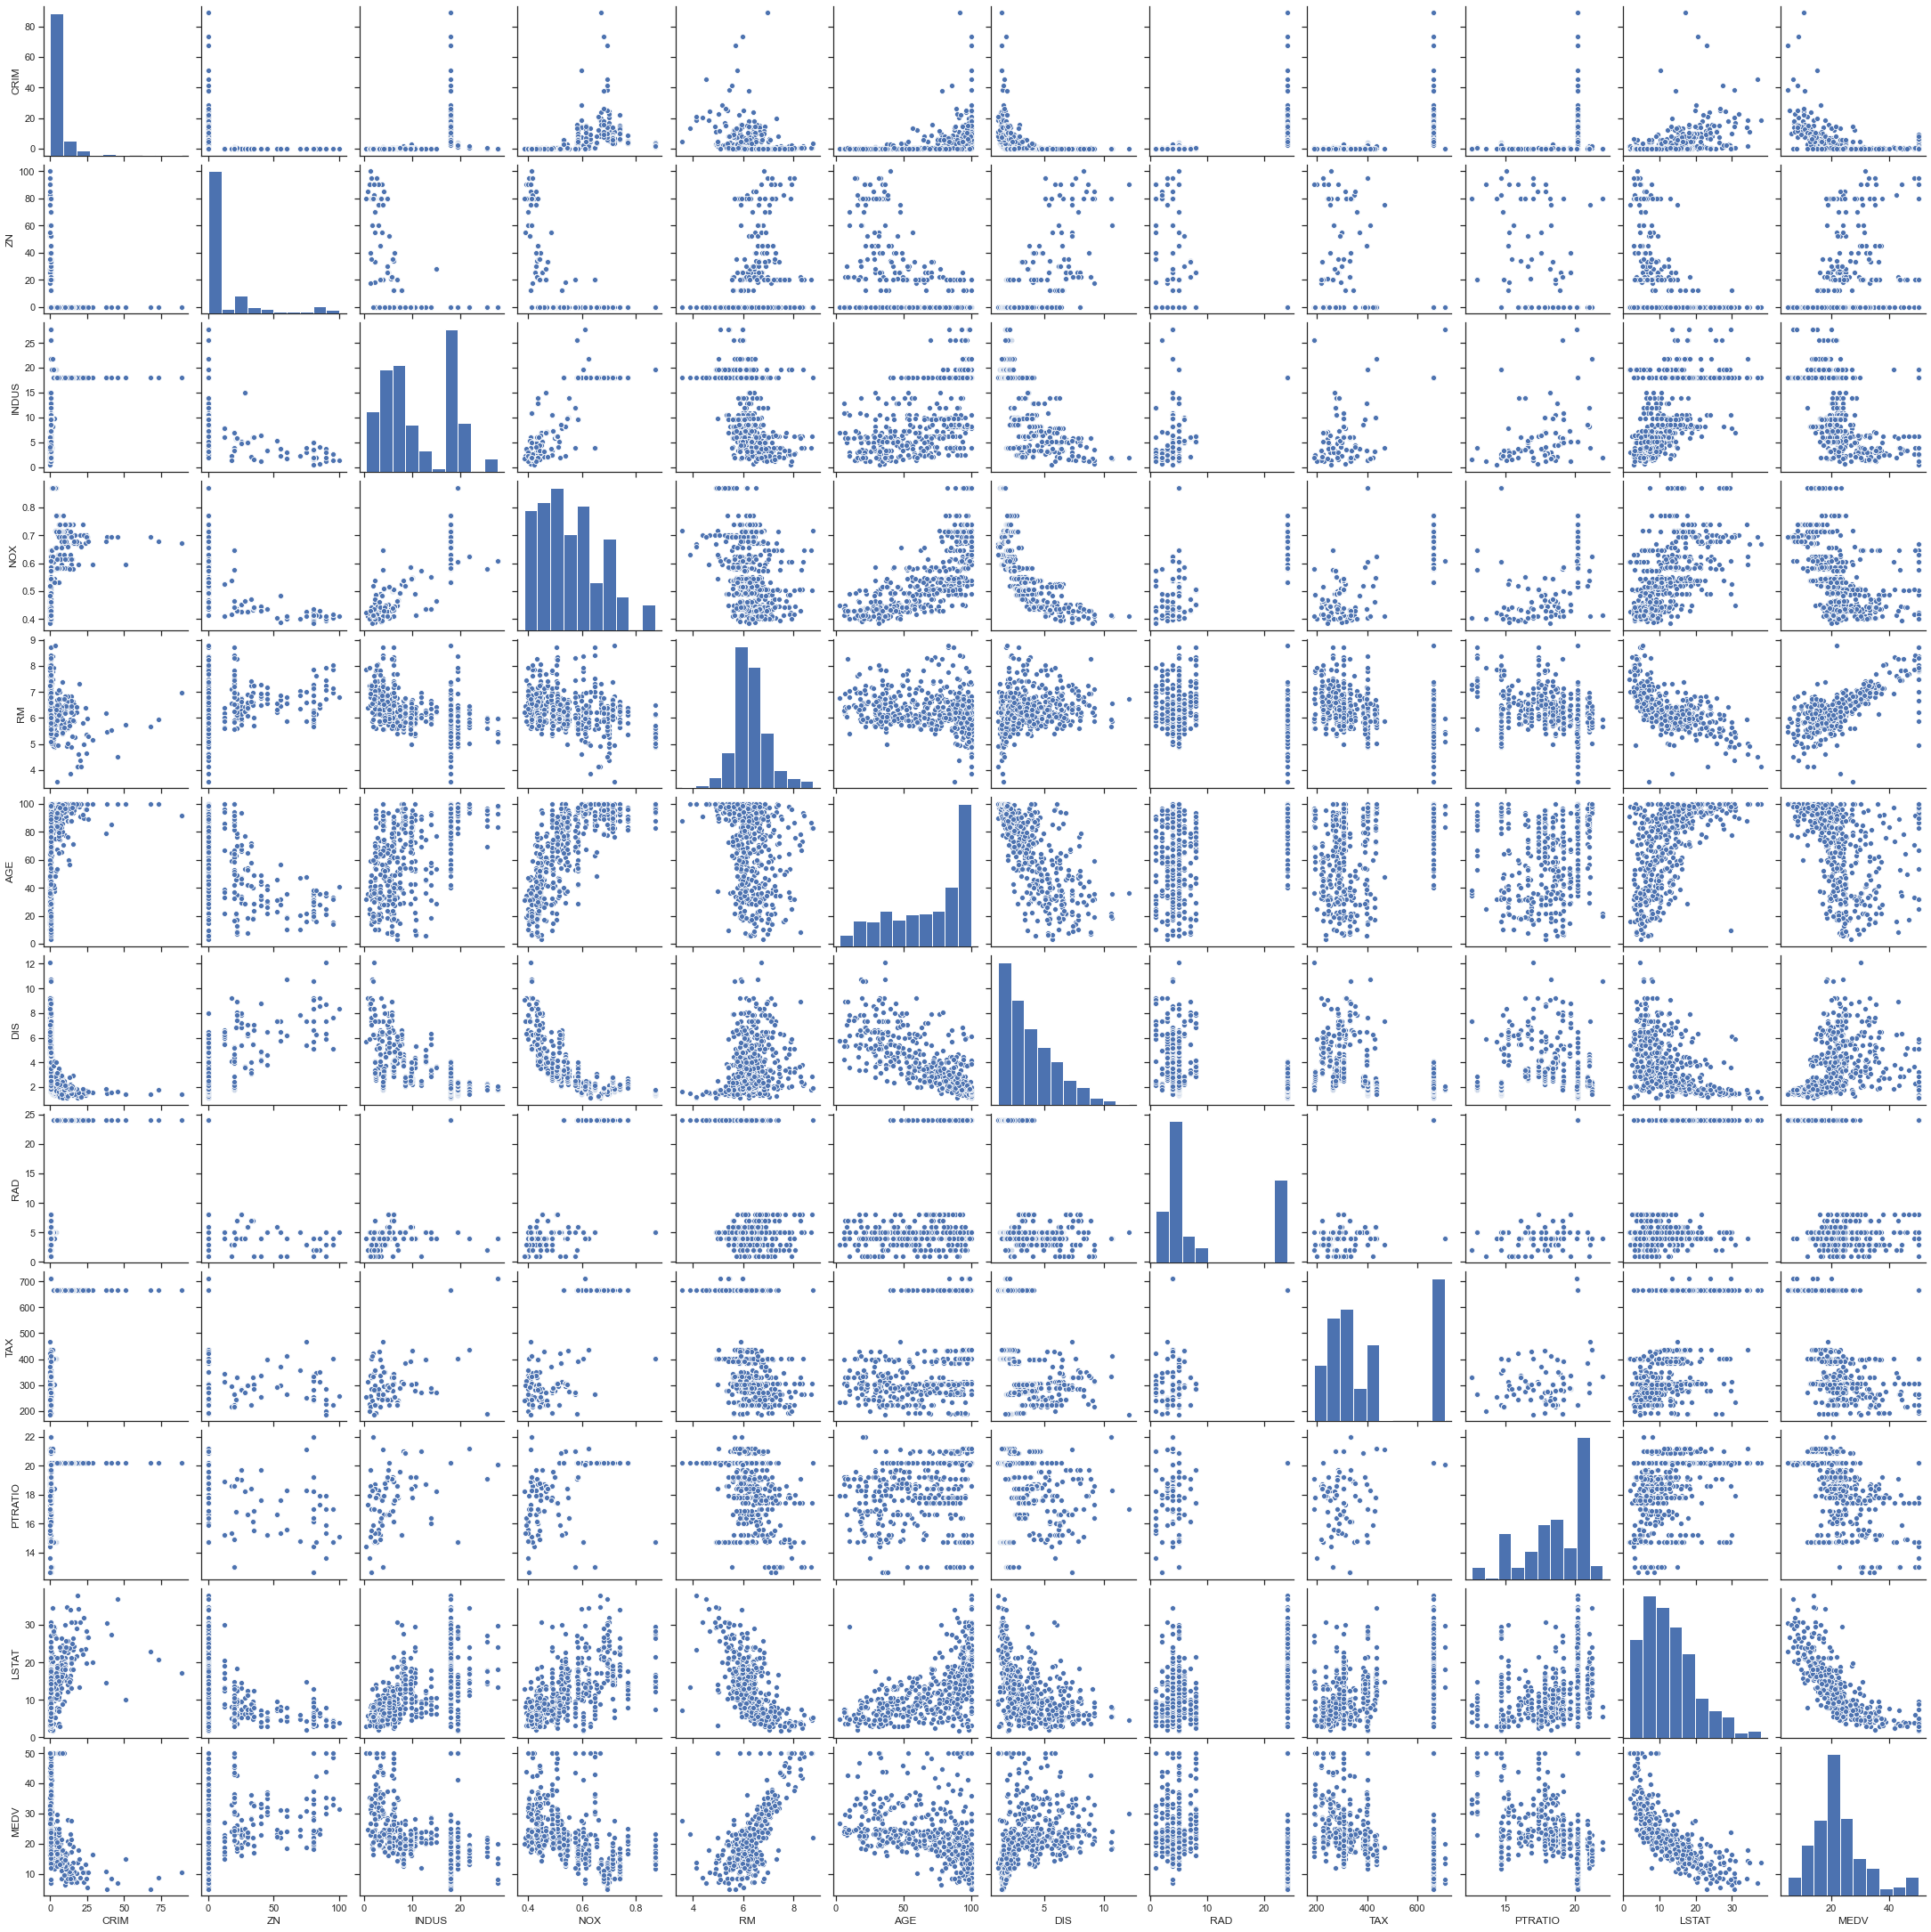

In [11]:
import seaborn as sns;
sns.set(style="ticks", color_codes=False)
g = sns.pairplot(data)

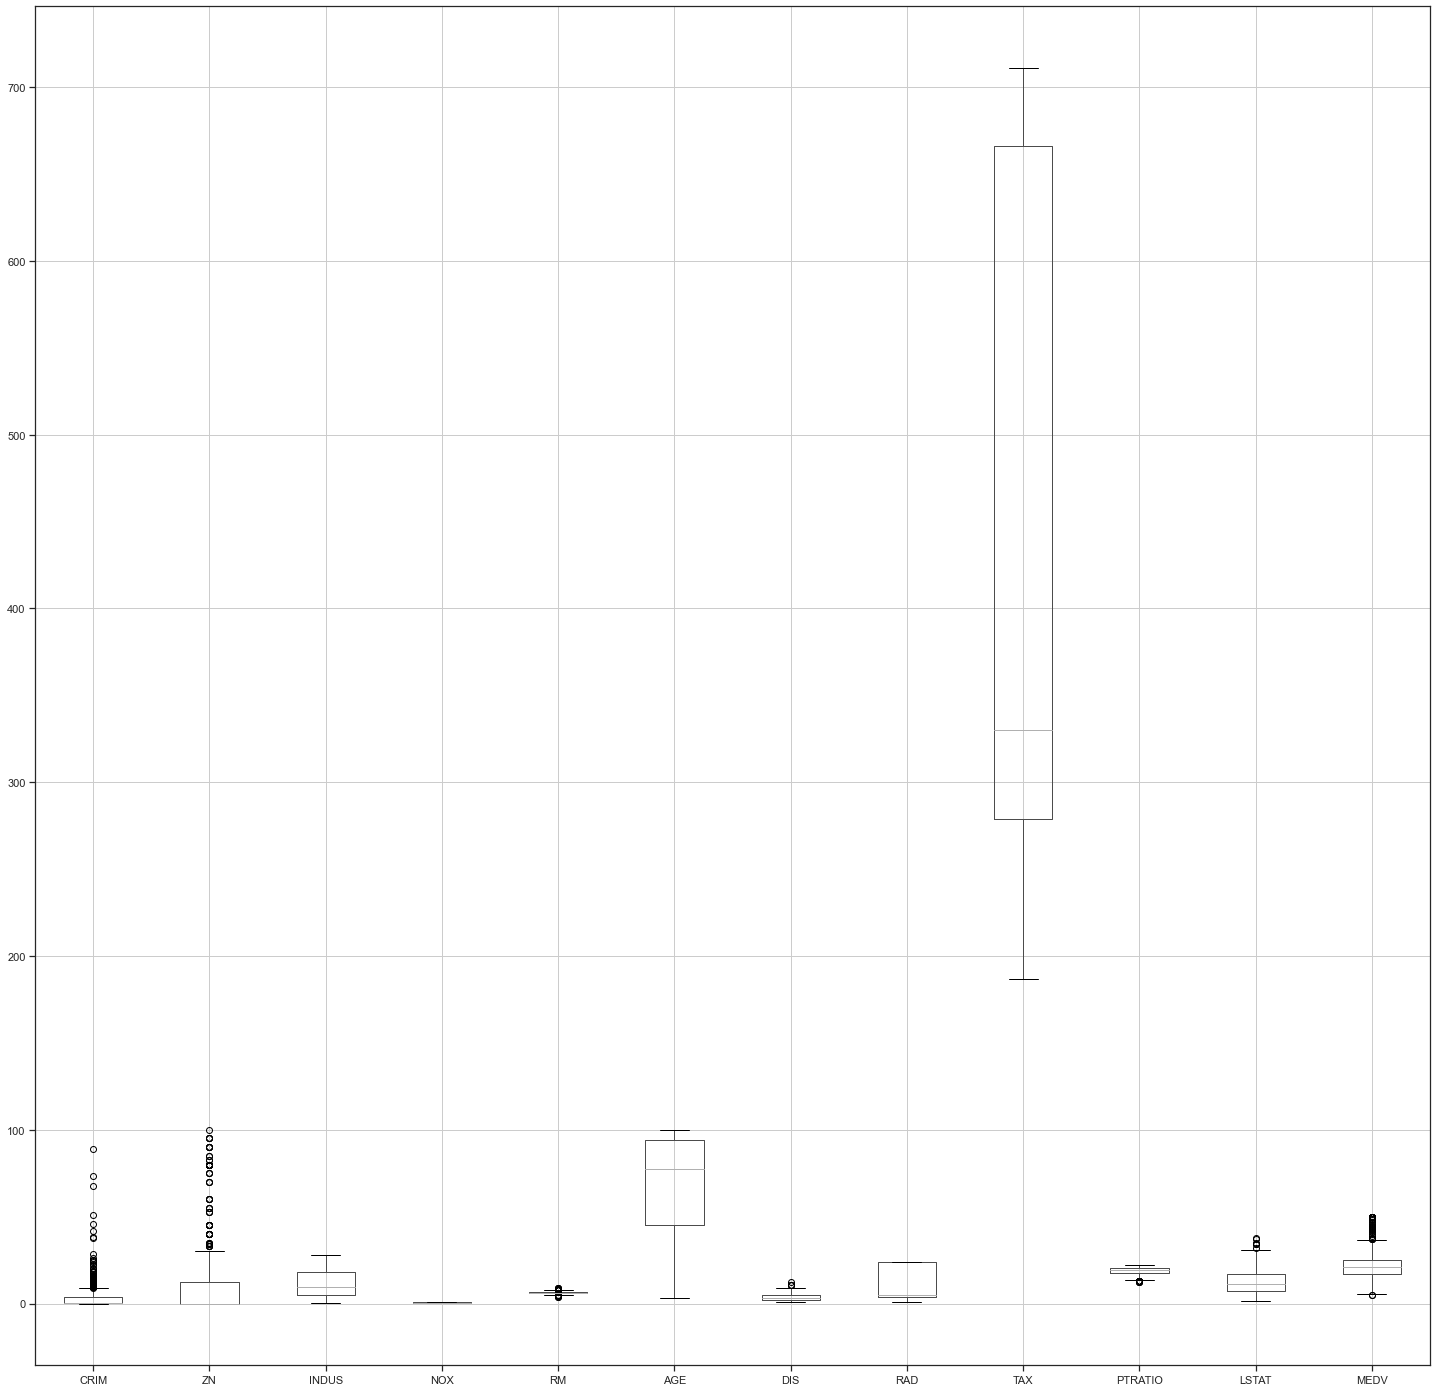

In [12]:
data.boxplot(figsize=(25,25))

# Here we have got an overview on outliers and also get to that RM and LSTAT stongly vary with the label

# Identify and treat missing values and remove dataset outliers

# Checking for missing value

In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

# There is no missing values in the dataset

# Removing outliers using IQR score

In [14]:
Q1=data.quantile(0.25)
Q2=data.quantile(0.75)
IQR=Q2-Q1
print(IQR)

CRIM         3.595037
ZN          12.500000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
LSTAT       10.005000
MEDV         7.975000
dtype: float64


In [15]:
data_1=data[~((data < (Q1 - 1.5 * IQR)) | (data> (Q2 + 1.5 * IQR))).any(axis=1)]
data_1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [16]:
print("original data shape : ", data.shape)
print("After removing outliers : ",data_1.shape)

original data shape :  (506, 12)
After removing outliers :  (333, 12)


# The outliers has been removed

In [17]:
data_1.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.232305,0.527704,0.604863,-0.046642,0.375886,-0.438968,0.897528,0.819729,0.241406,0.364186,-0.414066
ZN,-0.232305,1.000000,-0.342705,-0.394587,0.167750,-0.349581,0.603303,-0.143593,-0.265453,-0.173168,-0.247422,0.206471
INDUS,0.527704,-0.342705,1.000000,0.707457,-0.270423,0.523398,-0.672374,0.438353,0.647154,0.130847,0.501312,-0.479291
NOX,0.604863,-0.394587,0.707457,1.000000,-0.276489,0.616556,-0.717702,0.470287,0.599639,-0.044144,0.493692,-0.472870
RM,-0.046642,0.167750,-0.270423,-0.276489,1.000000,-0.169552,0.198318,0.038051,-0.090087,0.020225,-0.584779,0.601253
AGE,0.375886,-0.349581,0.523398,0.616556,-0.169552,1.000000,-0.640810,0.255522,0.394583,0.093838,0.580958,-0.485976
DIS,-0.438968,0.603303,-0.672374,-0.717702,0.198318,-0.640810,1.000000,-0.311683,-0.489968,-0.091354,-0.421799,0.328851
RAD,0.897528,-0.143593,0.438353,0.470287,0.038051,0.255522,-0.311683,1.000000,0.868518,0.334579,0.238441,-0.276822
TAX,0.819729,-0.265453,0.647154,0.599639,-0.090087,0.394583,-0.489968,0.868518,1.000000,0.322155,0.362194,-0.449201
PTRATIO,0.241406,-0.173168,0.130847,-0.044144,0.020225,0.093838,-0.091354,0.334579,0.322155,1.000000,0.093927,-0.287928


# correlation of labels with other

# Correlation of labels with output

In [18]:
corr_matrix=data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

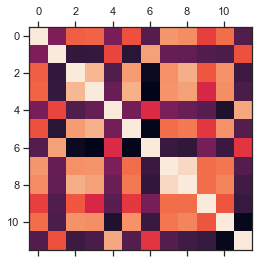

In [19]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

# Here we have seen that LSTAT and PTRATIO is strongly negatively correlated and RM is strongly positively correlated